# Perceptron training algorithm - Sai Teja Karnati

In [331]:
import math
import matplotlib.pyplot  as plt
import random
import numpy as np

Sections Q3: A-H : Creating Random Weights and preserving using seed so it doesn't change each time

Change N to 10-100-1000 for different data sizes

In [332]:
n=1000

Initialing random Data and preserving using seed

In [1]:
np.random.seed(3)
w0 = np.random.uniform(-1/4,1/4)
w1 = np.random.uniform(-1,1)
w2 = np.random.uniform(-1,1)
print("w0,w1,w2 = "+str(w0) +"," + str(w1) +","+str(w2) )
actualWeights= np.array([w0,w1,w2])
space= np.random.uniform(-1,1,(2,n))

NameError: name 'np' is not defined

Initializing some variables to plot positive and negative points

In [334]:
labels=[]
pospoints=[]
negpoints=[]
positivepointsx=[]
positivepointsy=[]
negativepointsx = []
negativepointsy = []
epochsAcc = []

Q3:i Classifying, recording and plotting the original classifications and points

In [335]:
for i in range(100):
    if (w0+w1*space[0][i] + w2*space[1][i])>=0:
        labels.append(1)
        positivepointsx.append(space[0][i])
        positivepointsy.append(space[1][i])
    else:
        labels.append(0)
        negativepointsx.append(space[0][i])
        negativepointsy.append(space[1][i])

pospoints.append(positivepointsx)
pospoints.append(positivepointsy)
negpoints.append(negativepointsx)
negpoints.append(negativepointsy)
xp = pospoints[0]
yp = pospoints[1]
xn = negpoints[0]
yn = negpoints[1]

Initializing random Weights to train with Perceptron training algorithm

In [336]:
np.random.seed(5)
w01 = np.random.uniform(-1,1)
w11 = np.random.uniform(-1,1)
w21 = np.random.uniform(-1,1)
predictedweights = np.array([w01,w11,w21])
print("w0,w1,w2 = "+str(w01) +"," + str(w11) +","+str(w21))

w0,w1,w2 = -0.556013657820521,0.7414646123547528,-0.5865616893211472


Function to tell us the accuracy of predictions from updated weights compared to the actual weights

In [337]:
def accuracy(matrix,weights,actualweights):
    correct=0
    for i in range(len(matrix[0])):
        if weights[0] + weights[1]*matrix[0][i] +weights[2]*matrix[1][i] >=0:
            pred=1
        else:
            pred=0
        if actualweights[0] + actualweights[1]*matrix[0][i] +actualweights[2]*matrix[1][i] >=0:
            actual=1
        else:
            actual=0
        if(actual==pred):
            correct= correct+1
    #print( "correct: "+ str(correct)+", accuracy: "+ str(correct/n))
    return correct/n

Q3:i Function to plot graphs for each epoch with updated weights and accuracy along with points and lines

In [338]:
def plottingline(actualweights,weights,accuracy,epoch): 
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1) 
    ax1.scatter(xp,yp, s=10, c='b', marker="s", label='S1')
    ax1.scatter(xn,yn, s=10, c='r', marker="o", label='S0')
    ax1.legend()
    ax1.grid(True)
    
    x = np.linspace(-1,1,100)
    y = (-actualweights[1]*x+-actualweights[0])/actualweights[2]
    x1 = np.linspace(-1,1,100)
    y1 = (-weights[1]*x1+-weights[0])/weights[2]
    plt.plot(x1, y1, '-r', label= 'Updated line with accuracy:'+str(accuracy))

    plt.plot(x, y, '-g', label= 'Original line')
    plt.title('Graph of training @ epoch: '+str(epoch))
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

Q4:j - Updating weights using PTA 

In [303]:
def trainingWeights(matrix,weights,labels,actualweights,epochs,alpha):
    for e in range(epochs):
        temp_accuracy = accuracy(matrix,weights,actualweights)
        #print("Epoch count:"+str(e) + ", Current weights:"+str(weights)+ " Accuracy(M,W,AW)" + str(temp_accuracy))
        epochsAcc.append([e,temp_accuracy*100])
        if temp_accuracy==1:    
            print("Epoch count:"+str(e) + ", Current weights:"+str(weights)+ " Accuracy(M,W,AW)" + str(temp_accuracy))
            plottingline(actualweights,weights,temp_accuracy,e)
            print("Successful Convergence")
            break
        #plottingline(actualweights,weights,temp_accuracy,e)

        for i in range(len(matrix[0])):
            if weights[0] + weights[1]*matrix[0][i] +weights[2]*matrix[1][i] >=0:
                pred=1
            else:
                pred=0
            if actualweights[0] + actualweights[1]*matrix[0][i] +actualweights[2]*matrix[1][i] >=0:
                actual=1
            else:
                actual=0
            #print("weights updated from :  ",weights[0],weights[1],weights[2])
            error = actual - pred
            weights[0]=weights[0] + alpha*error
            weights[1]=weights[1] + alpha*error*matrix[0][i]
            weights[2]=weights[2] + alpha*error*matrix[1][i]

Finally, calling the training functions, we can change the last two hyperparameters:epochs, learning rate alpha respectively

Epoch count:11, Current weights:[ 0.44398634  5.64634653 -5.71224446] Accuracy(M,W,AW)1.0


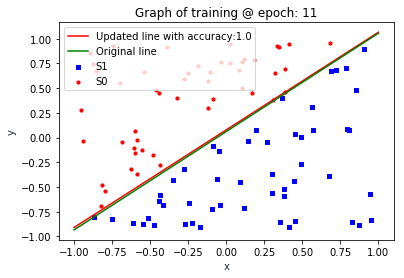

Successful Convergence


In [271]:
trainingWeights(space,predictedweights,labels,actualWeights,1000,1)

Q3:j:7: The obtained weights and the original weights have similar slope and dispacements as lines. Almost, parallel line but with sparser data, this might not be that true.With denser data, this will be more true.

Q3:k

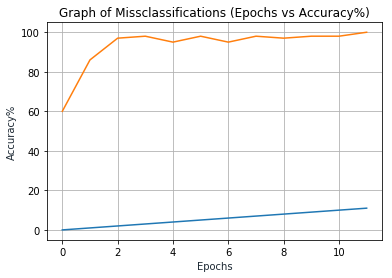

In [272]:
plt.plot(epochsAcc,label= '')
plt.title('Graph of Missclassifications (Epochs vs Accuracy%)')
plt.xlabel('Epochs', color='#1C2833')
plt.ylabel('Accuracy%', color='#1C2833')
plt.grid()
plt.show()


Q3:L - same experiment with Alpha = 10 and Plotting Epoch vs Missclassifications

Epoch count:53, Current weights:[   9.44398634  107.84480747 -111.1430712 ] Accuracy(M,W,AW)1.0


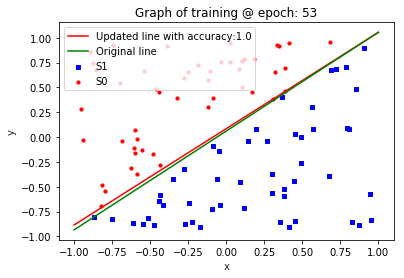

Successful Convergence


In [282]:
trainingWeights(space,predictedweights,labels,actualWeights,1000,10)

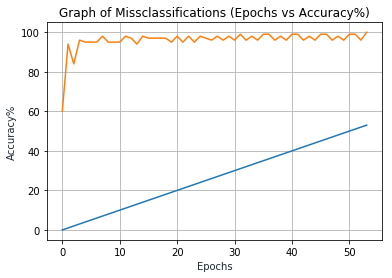

In [283]:
plt.plot(epochsAcc,label= '')
plt.title('Graph of Missclassifications (Epochs vs Accuracy%)')
plt.xlabel('Epochs', color='#1C2833')
plt.ylabel('Accuracy%', color='#1C2833')
plt.grid()
plt.show()

Q3:M - same experiment with Alpha = 0.1 and Plotting Epoch vs Missclassifications

Epoch count:1, Current weights:[ 0.04398634  0.70743669 -0.70613942] Accuracy(M,W,AW)1.0


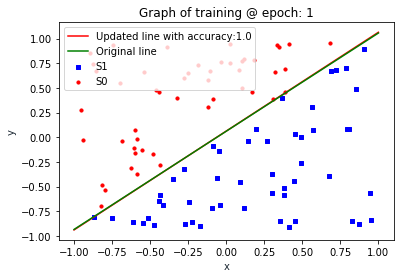

Successful Convergence


In [293]:
trainingWeights(space,predictedweights,labels,actualWeights,1000,0.1)

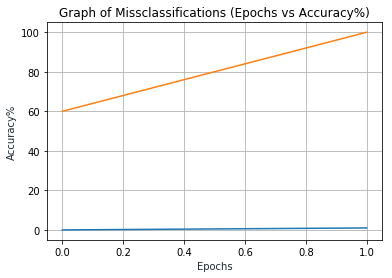

In [294]:
plt.plot(epochsAcc,label= '')
plt.title('Graph of Missclassifications (Epochs vs Accuracy%)')
plt.xlabel('Epochs', color='#1C2833')
plt.ylabel('Accuracy%', color='#1C2833')
plt.grid()
plt.show()

Q3: N : If we take a large alpha(learning rate), the number of epochs increases because of overshooting and if we take a very small alpha(learning rate), the number of epochs increases because of the changes in W being too slow. So, the optimal alpha is somewhere in middle which changes depending on data and initial random weights. For me, my optimal alpha is 0.1 which converges in just 1 epoch while apha=1 takes 11 epochs and alpha =10 takes 53 and alpha =0.01 takes 6 epochs.

Q3:O: I wouldn't have gotten the same results if i started with some other Weights and data. But the effects of overshooting with large alpha(learning rate) increasing the number of epochs and effects of slow learning with small alpha increasing the number of epochs will be similar. Alpha might not 0.1 as in my case but it wouldn't be too far apart like alpha=100 or something.

Q3:P Doing the same experiment with n=1000 for alpha=1,0.1,10,100

Epoch count:56, Current weights:[  1.44398634  22.05859617 -22.0936821 ] Accuracy(M,W,AW)1.0


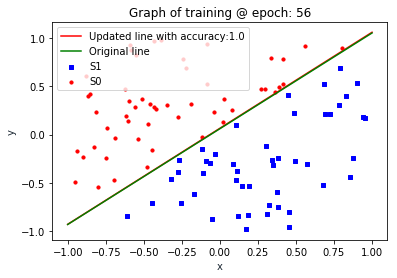

Successful Convergence


In [304]:
trainingWeights(space,predictedweights,labels,actualWeights,1000,1)

Epoch count:51, Current weights:[ 0.14398634  2.22861537 -2.23025595] Accuracy(M,W,AW)1.0


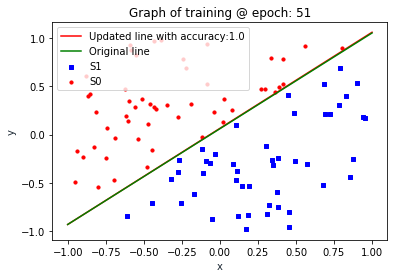

Successful Convergence


In [321]:
trainingWeights(space,predictedweights,labels,actualWeights,1000,0.1)

Epoch count:20, Current weights:[   9.44398634  146.13091556 -145.95527688] Accuracy(M,W,AW)1.0


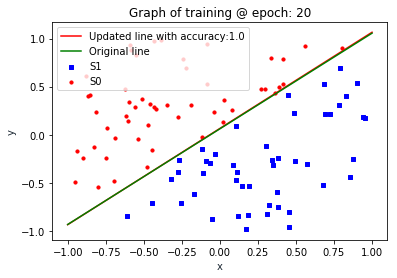

Successful Convergence


In [330]:
trainingWeights(space,predictedweights,labels,actualWeights,1000,10)

Epoch count:24, Current weights:[   99.44398634  1579.2280131  -1588.5921074 ] Accuracy(M,W,AW)1.0


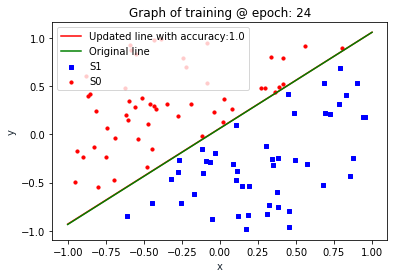

Successful Convergence


In [339]:
trainingWeights(space,predictedweights,labels,actualWeights,1000,100)

In the case of N=1000, I got convergences at:

alpha = 1 => epoch num 56 

alpha = 0.1 => epoch num 51

alpha = 10 => epoch num 20

alpha = 100 => epoch num 24

Therefore, in the case of N=1000, the optimal alpha is 10 with only 20 epochs. Major difference between n=100 and n=1000 is n=1000 needs more time and more epochs for convergence.